Pneumonia Image Recognitionognition

Introduction/ Buisness Understanding

Pneumonia is an infection of one or both of the lungs caused by bacteria, viruses, or fungi. It is a serious infection in which the air sacs fill with pus and other liquid. Lobar pneumonia affects one or more sections (lobes) of the lungs. Pneumonia accounts for 14% of all deaths of children under 5 years old, killing 740 180 children in 2019 The cost of antibiotic treatment for all children with pneumonia in 66 of the countdown to 2015 countries for maternal, newborn and child survival is estimated at around US$ 109 million per year. The price includes the antibiotics and diagnostics for pneumonia management. treat pneumonia focusing on making sure that every sick child has access to the right kind of care -- either from a community-based health worker, or in a health facility if the disease is severe -- and can get the antibiotics and oxygen they need to get well; Pneumonia is the world’s biggest infectious killer of adults and children – claiming 2.5 million lives, including 672,000 children under five, in 2019. That’s one person dying every 13 seconds

Import Libraries

In [1]:
#!pip install tensorflow

In [36]:
# Necessary libraries and classes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from keras import models
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor


import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This prevents kernel shut down due to xgboost conflict

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix

Functions

Data Understanding

The data contains more than 5000 images of pneumonia of viral and bacterial pneumonia of and children 1-5 in Guangzhou Women and Children’s Medical Center, Guangzhou. The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Data Cleaning

In [3]:
train_data_dir = 'train'
test_data_dir = 'test'

#Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
       test_data_dir, 
       target_size=(64, 64), batch_size=132)

#Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
       train_data_dir, 
       target_size=(64, 64), batch_size=790)

#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


Create validation set from training set

In [4]:
X = train_images
y = train_labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Preview images (Normal)

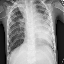

In [5]:
array_to_img(train_images[0])

In [6]:
print(train_labels[0])

[0. 1.]


Preview Images (Pneumonia)

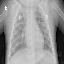

In [7]:
array_to_img(train_images[90])

In [8]:
print(train_labels[90])

[0. 1.]


In [9]:
print('X_train shape: ',np.shape(X_train))
print('y_train shape: ',np.shape(y_train))
print('X_val shape: ',np.shape(X_val))
print('y_val shape: ',np.shape(y_val))

X_train shape:  (632, 64, 64, 3)
y_train shape:  (632, 2)
X_val shape:  (158, 64, 64, 3)
y_val shape:  (158, 2)


Reshape images

In [10]:
#train set
X_train_unrow = X_train.reshape(632, -1)
X_train_unrow.shape

(632, 12288)

In [11]:
#test set
X_val_unrow = X_val.reshape(158, -1)
X_val_unrow.shape

(158, 12288)

Labels for images

In [12]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Transpose and resize train and test sets

In [14]:
#training set
y_train_labels_final = np.reshape(y_train[:,0], (632,1))

In [15]:
np.shape(y_train_labels_final)

(632, 1)

In [16]:
#test set
y_val_labels_final = np.reshape(y_val[:,0], (158,1))

In [17]:
np.shape(y_val_labels_final) 

(158, 1)

In [18]:
#scaling the data
X_train_img_final = X_train_unrow/255
X_val_img_final = X_val_unrow/255

type(X_val_img_final)

numpy.ndarray

In [19]:
print(X_train_img_final.shape)
print(X_val_img_final.shape)

(632, 12288)
(158, 12288)


TANH model creation

In [20]:
np.random.seed(42)
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(63, activation='tanh', input_shape=(12288,)))
model_tanh.add(layers.Dense(42, activation='tanh'))
model_tanh.add(layers.Dense(21, activation='tanh'))
model_tanh.add(layers.Dense(1, activation='sigmoid')) #output layer, binary classification

In [21]:
model_tanh.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

results_tanh = model_tanh.fit(X_train_img_final,
                    y_train_labels_final,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val_img_final, y_val_labels_final))

Epoch 1/50
20/20 [==============================] - 0s 25ms/step - loss: 0.5944 - recall: 0.0520 - val_loss: 0.5315 - val_recall: 0.0000e+00
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5514 - recall: 0.0000e+00 - val_loss: 0.4946 - val_recall: 0.0000e+00
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5219 - recall: 0.1618 - val_loss: 0.4341 - val_recall: 0.0263
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4930 - recall: 0.3295 - val_loss: 0.4579 - val_recall: 0.0263
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4518 - recall: 0.4971 - val_loss: 0.3765 - val_recall: 0.1579
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4905 - recall: 0.4624 - val_loss: 0.4426 - val_recall: 0.0000e+00
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4495 - recall: 0.4220 - val_loss: 0.6272 - val_recall: 1.0000
Epoch 8/50
20/20 [=============

In [22]:
results_train = model_tanh.evaluate(X_train_img_final, y_train_labels_final)

20/20 [==============================] - 0s 2ms/step - loss: 0.1771 - recall: 0.7746


In [23]:
results_val = model_tanh.evaluate(X_val_img_final, y_val_labels_final)

5/5 [==============================] - 0s 2ms/step - loss: 0.1824 - recall: 0.7105


In [24]:
#plot acc vs loss for train and test set
def visualize_results(results3):
    history = results3.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show();

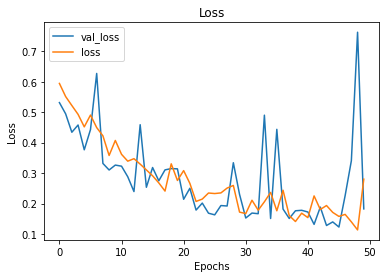

In [25]:
visualize_results(results_tanh)

RELU Model

In [26]:
np.random.seed(42)
model_relu = models.Sequential()
model_relu.add(layers.Dense(63, activation='relu', input_shape=(12288,)))
model_relu.add(layers.Dense(42, activation='relu'))
model_relu.add(layers.Dense(21, activation='relu'))
model_relu.add(layers.Dense(1, activation='sigmoid')) #output layer, binary classification

In [27]:
model_relu.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), 'acc'])

results = model_relu.fit(X_train_img_final,
                    y_train_labels_final,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val_img_final, y_val_labels_final))

Epoch 1/50
20/20 [==============================] - 0s 17ms/step - loss: 0.5932 - recall_1: 0.0520 - acc: 0.7041 - val_loss: 0.5254 - val_recall_1: 0.0000e+00 - val_acc: 0.7595
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.5447 - recall_1: 0.0000e+00 - acc: 0.7263 - val_loss: 0.4765 - val_recall_1: 0.0000e+00 - val_acc: 0.7595
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5280 - recall_1: 0.0751 - acc: 0.7421 - val_loss: 0.4719 - val_recall_1: 0.0000e+00 - val_acc: 0.7595
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4902 - recall_1: 0.2486 - acc: 0.7801 - val_loss: 0.8743 - val_recall_1: 1.0000 - val_acc: 0.2975
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 0.4904 - recall_1: 0.3526 - acc: 0.7611 - val_loss: 0.3647 - val_recall_1: 0.5000 - val_acc: 0.8608
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.3884 - recall_1: 0.5376 - acc: 0.8449 - val_loss:

20/20 [==============================] - 0s 7ms/step - loss: 0.1086 - recall_1: 0.9017 - acc: 0.9557 - val_loss: 0.1540 - val_recall_1: 0.9737 - val_acc: 0.9494
Epoch 49/50
20/20 [==============================] - 0s 6ms/step - loss: 0.1232 - recall_1: 0.9133 - acc: 0.9525 - val_loss: 0.5343 - val_recall_1: 1.0000 - val_acc: 0.7595
Epoch 50/50
20/20 [==============================] - 0s 6ms/step - loss: 0.2239 - recall_1: 0.8613 - acc: 0.9304 - val_loss: 0.1325 - val_recall_1: 0.9474 - val_acc: 0.9557


In [28]:
results_train = model_relu.evaluate(X_train_img_final, y_train_labels_final)

20/20 [==============================] - 0s 2ms/step - loss: 0.1040 - recall_1: 0.9480 - acc: 0.9652


In [29]:
results_val = model_relu.evaluate(X_val_img_final, y_val_labels_final)

5/5 [==============================] - 0s 2ms/step - loss: 0.1325 - recall_1: 0.9474 - acc: 0.9557


<AxesSubplot:>

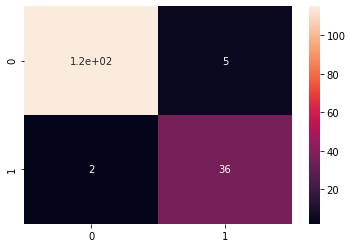

In [37]:
label_pred = (model_relu.predict(X_val_img_final) > 0.5).astype(int)

cf_matrix = confusion_matrix(y_val_labels_final, label_pred)

sns.heatmap(cf_matrix, annot=True)

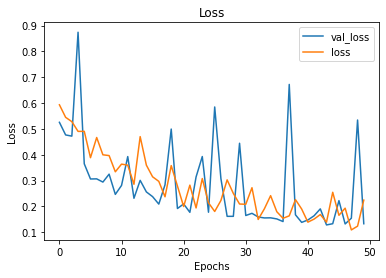

In [38]:
visualize_results(results)